<a href="https://colab.research.google.com/github/AhmedEhab2022/forest-cover-type-classification/blob/main/Forest_Cover_Type_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import required libraries

In [ ]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Google Colab integration
from google.colab import drive

# Import the dataset

In [ ]:
drive.mount('/content/drive')

path = "/content/drive/MyDrive/Forest Cover Type Classification/covtype.data"

# The cover type UCI dataset is .data file (as .csv file but without headers/columns)
# we should add header/columns statically in the code

cols = [
    # Continuous features
    "Elevation", "Aspect", "Slope",
    "Horizontal_Distance_To_Hydrology",
    "Vertical_Distance_To_Hydrology",
    "Horizontal_Distance_To_Roadways",
    "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm",
    "Horizontal_Distance_To_Fire_Points",

    # Wilderness areas (4 binary)
    "Wilderness_Area1", "Wilderness_Area2", "Wilderness_Area3", "Wilderness_Area4",

    # Soil types (40 binary)
    *[f"Soil_Type{i}" for i in range(1, 41)],

    # Target
    "Cover_Type"
]

df = pd.read_csv(path, header=None, names=cols)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Basic Info

In [ ]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [ ]:
df.shape

(581012, 55)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [ ]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


# Cleaning Dataset

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
Elevation,0
Aspect,0
Slope,0
Horizontal_Distance_To_Hydrology,0
Vertical_Distance_To_Hydrology,0
Horizontal_Distance_To_Roadways,0
Hillshade_9am,0
Hillshade_Noon,0
Hillshade_3pm,0
Horizontal_Distance_To_Fire_Points,0


The categorical data is already encoded, so no need for encoding.

The data is already cleaned except for scaling the values if I use logistic regression, but the dataset is large, so it's not good to use in this case

# Exploring distributions and correlation

## Histogram of key features

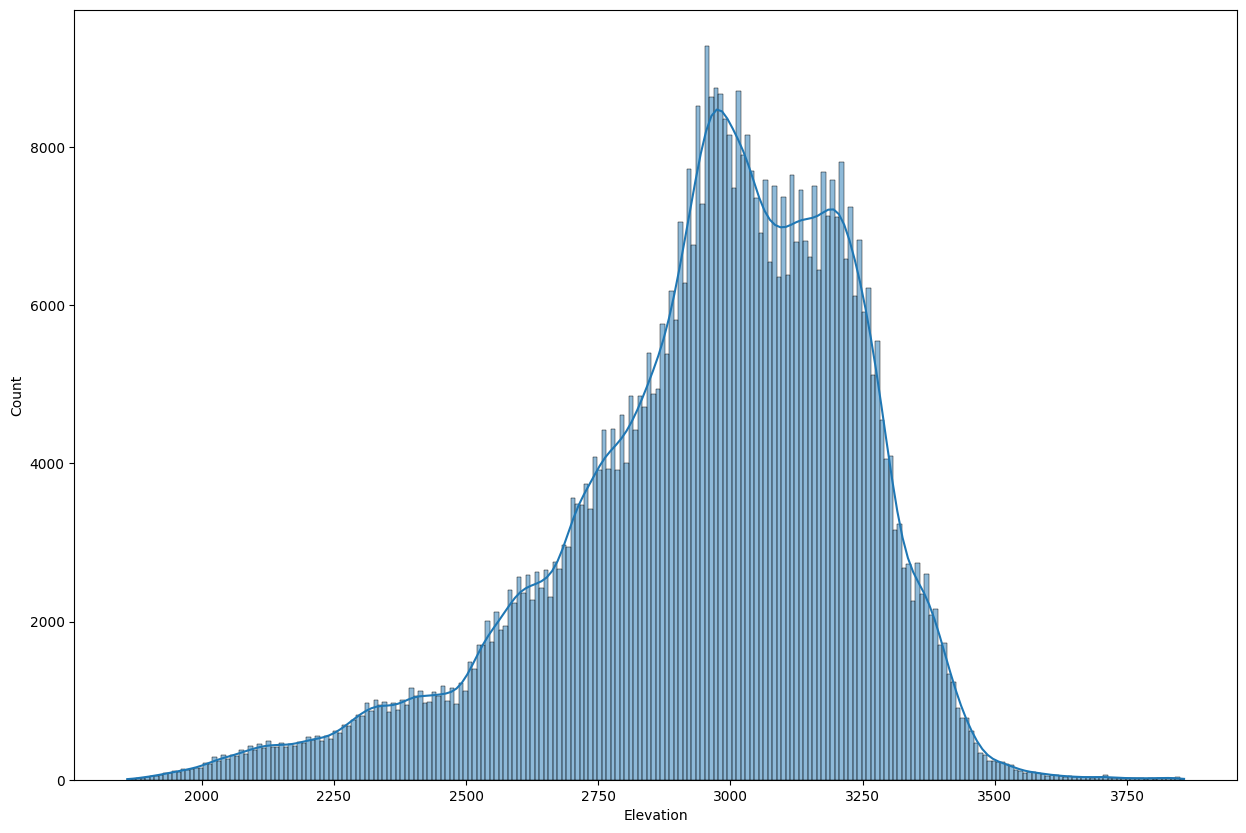

In [ ]:
plt.figure(figsize=(15, 10))
sns.histplot(data=df, x="Elevation", kde=True)
plt.show()

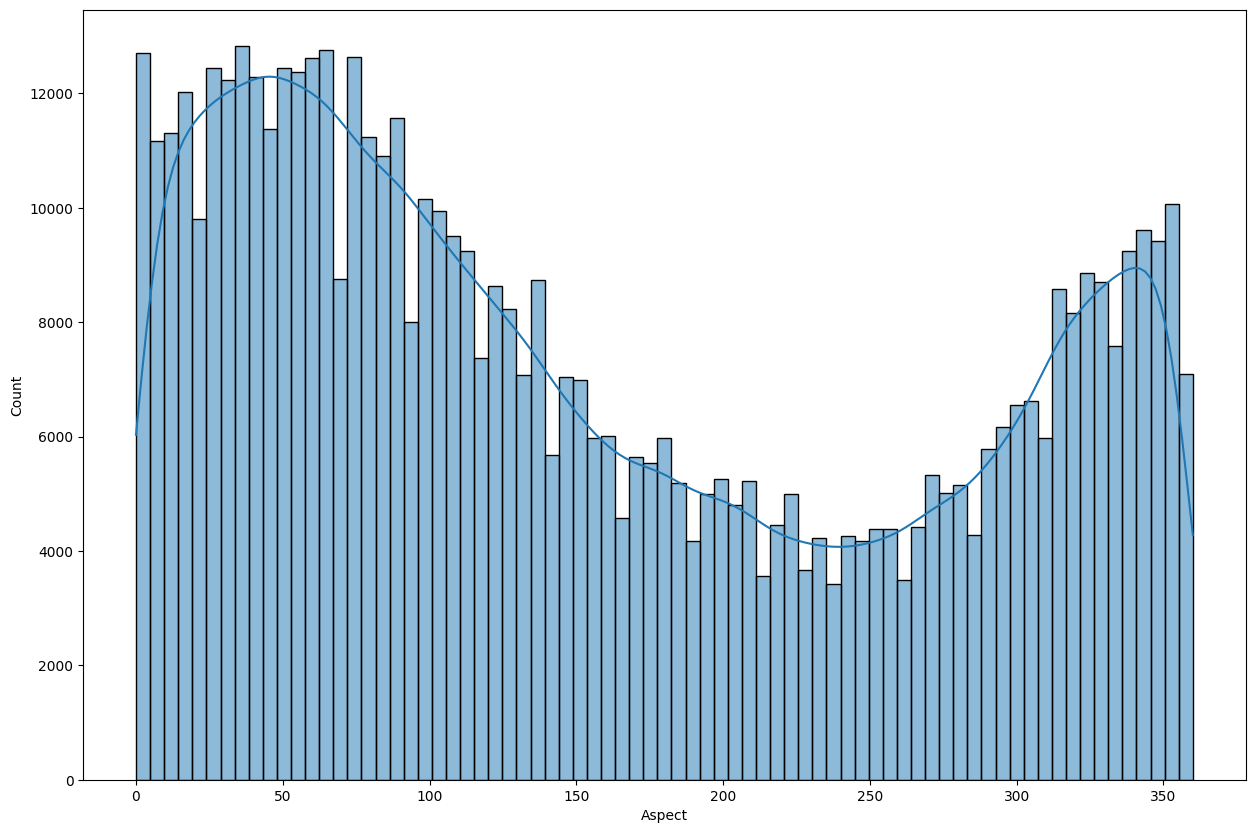

In [ ]:
plt.figure(figsize=(15, 10))
sns.histplot(data=df, x="Aspect", kde=True)
plt.show()

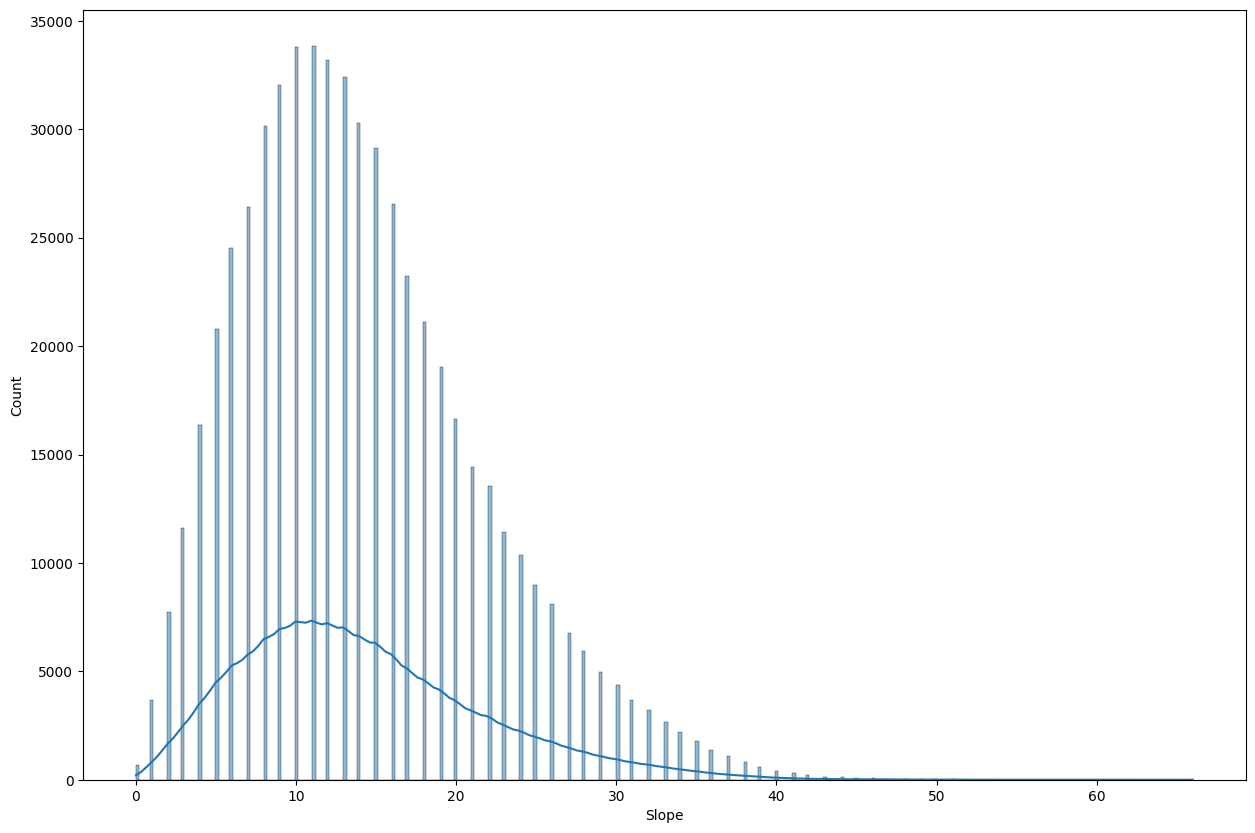

In [ ]:
plt.figure(figsize=(15, 10))
sns.histplot(data=df, x="Slope", kde=True)
plt.show()

## Check for cover type balancing

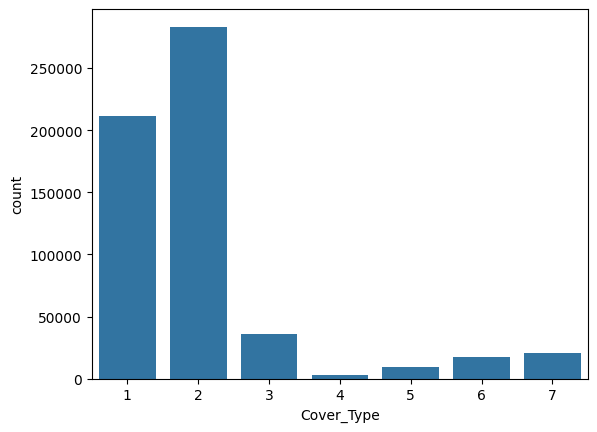

In [ ]:
sns.countplot(x="Cover_Type", data=df)
plt.show()

The Data is imbalanced

## Stacked bar chart

In [ ]:
# Proportion of each wilderness area per Cover_Type.
pd.crosstab(df["Cover_Type"],
            [df["Wilderness_Area1"], df["Wilderness_Area2"],
             df["Wilderness_Area3"], df["Wilderness_Area4"]])


Wilderness_Area1      0                      1
Wilderness_Area2      0              1       0
Wilderness_Area3      0       1      0       0
Wilderness_Area4      1       0      0       0
Cover_Type                                    
1                     0   87528  18595  105717
2                  3026  125093   8985  146197
3                 21454   14300      0       0
4                  2747       0      0       0
5                     0    5712      0    3781
6                  9741    7626      0       0
7                     0   13105   2304    5101

## Most common soils

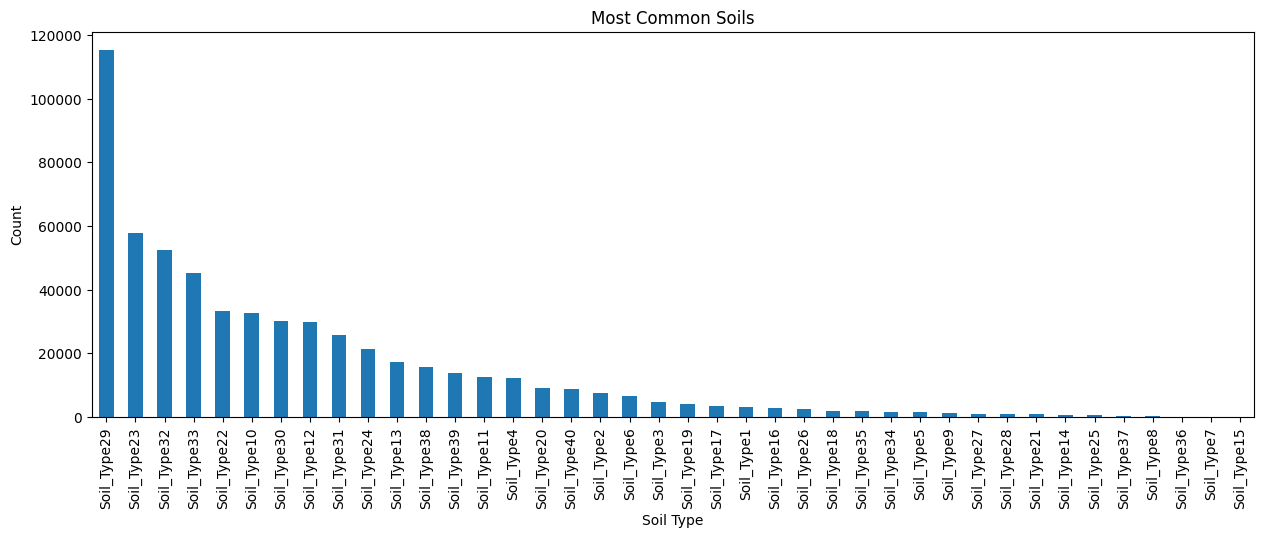

In [ ]:
soil_cols = [col for col in df.columns if "Soil_Type" in col]
df[soil_cols].sum().sort_values()[::-1].plot(kind="bar", figsize=(15,5))
plt.title("Most Common Soils")
plt.xlabel("Soil Type")
plt.ylabel("Count")
plt.show()

## Correlation matrix

In [ ]:
categorical_cols = ["Wilderness_Area1", "Wilderness_Area2", "Wilderness_Area3", "Wilderness_Area4"] + soil_cols
numrical_cols = df.columns.difference(categorical_cols)
fig = px.imshow(df[numrical_cols].corr(), title="Correlation Matrix", color_continuous_scale="RdBu", text_auto=True)
fig.update_layout(width=1000, height=900)
fig.show()

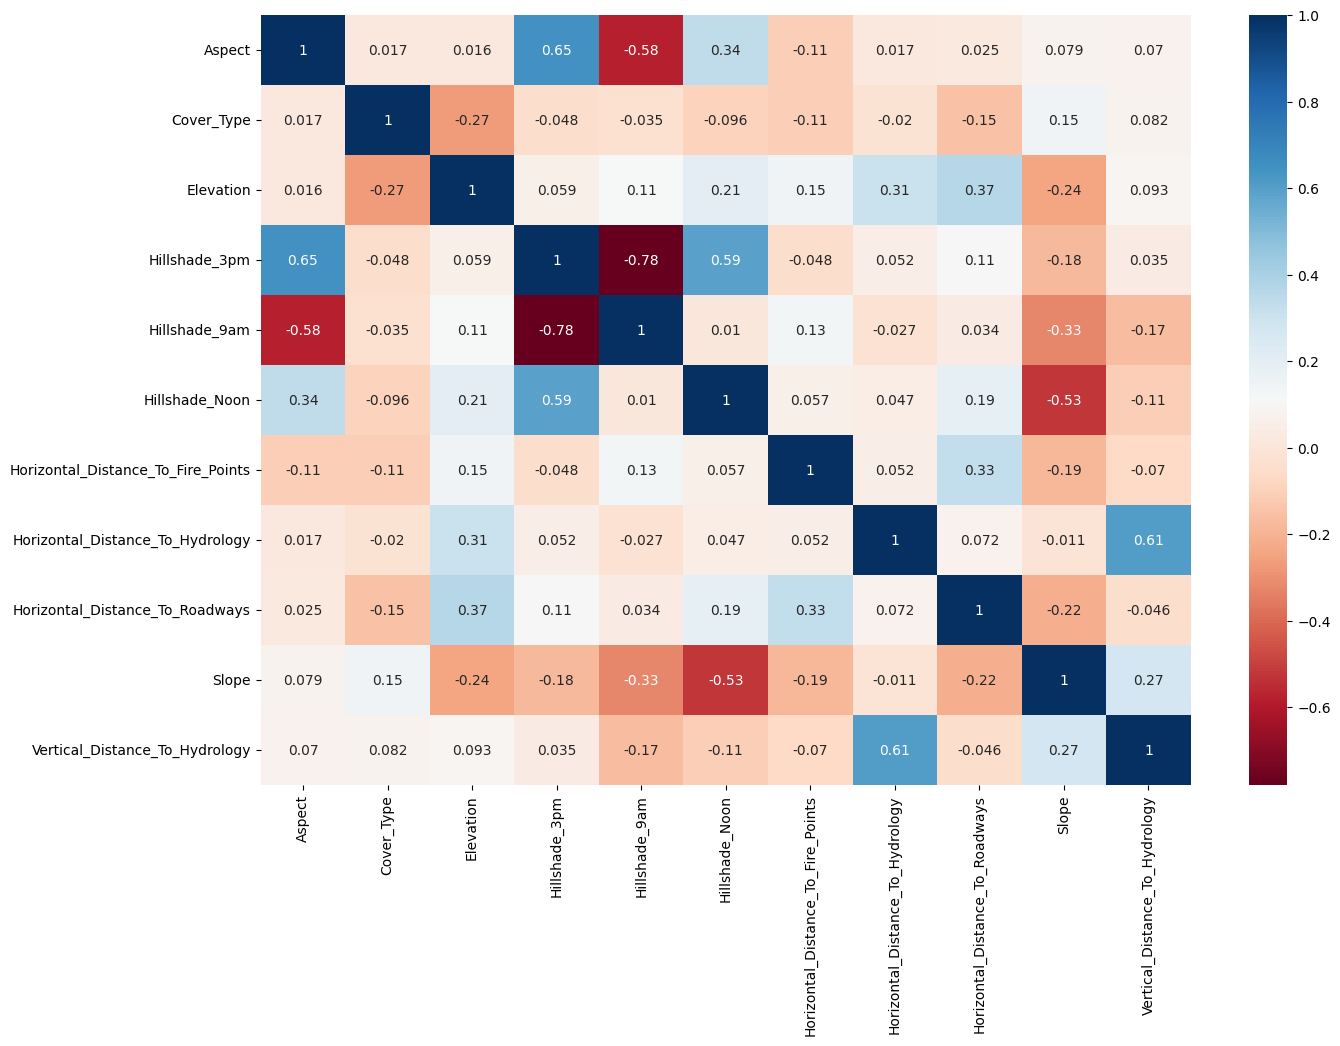

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(df[numrical_cols].corr(), annot=True, cmap="RdBu")
plt.show()

# Training and Evaluating models

## Spliting dataset

In [ ]:
# drop Cover_Type column
X = df.drop("Cover_Type", axis=1)
y = df["Cover_Type"]

# stratify=y make sure that the cover types distributed fairly in the splited data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## Utilities

In [ ]:
def evaluate_classification(algo, y_test, y_pred, confusion_matrix_labels=None):
  print(f"Accuracy: {round(accuracy_score(y_test, y_pred), 2) * 100}%")

  print("\nClassification Report:")
  print(classification_report(y_test, y_pred))

  print("\nConfusion Matrix:")
  cm = confusion_matrix(y_test, y_pred)
  if confusion_matrix_labels is not None:
    cm = pd.DataFrame(cm, index=confusion_matrix_labels, columns=confusion_matrix_labels)
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title(f"Confusion Matrix - {algo}")
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.show()

def plot_feature_importance(model, feature_names):
  plt.figure(figsize=(12, 6))
  feature_importance = model.feature_importances_
  # get sorted indices that would sort the feature_importances from most important feature to least one
  sorted_idx = np.argsort(feature_importance)[::-1]
  # creates bar chart with one bar for feature
  plt.bar(range(X_train.shape[1]), feature_importance[sorted_idx])
  # replace the default x-axis labels with the actual feature names
  plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in sorted_idx], rotation=90)
  plt.xlabel("Features")
  plt.ylabel("Importance")
  plt.title("Feature Importance")
  plt.show()

## Decision Tree

### Training

In [ ]:
# random_state to get same result in each run (like seed function in generating random numbers)
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

dt_y_pred = dt_model.predict(X_test)

### Evalating

Accuracy: 94.0%

Classification Report:
              precision    recall  f1-score   support

           1       0.94      0.94      0.94     42368
           2       0.95      0.95      0.95     56661
           3       0.93      0.93      0.93      7151
           4       0.84      0.85      0.84       549
           5       0.84      0.84      0.84      1899
           6       0.88      0.87      0.88      3473
           7       0.95      0.94      0.95      4102

    accuracy                           0.94    116203
   macro avg       0.90      0.90      0.90    116203
weighted avg       0.94      0.94      0.94    116203


Confusion Matrix:


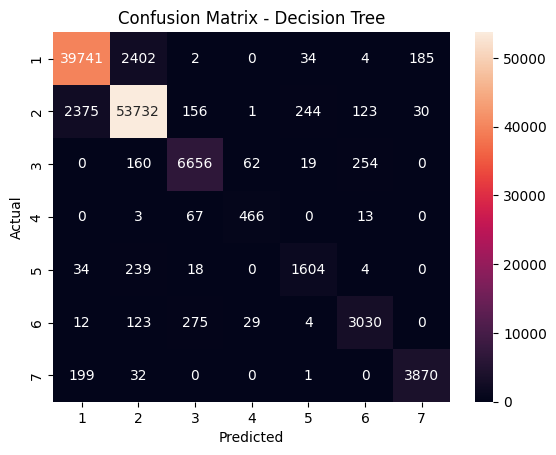

In [ ]:
evaluate_classification("Decision Tree", y_test, dt_y_pred, [i for i in range(1, 8)])

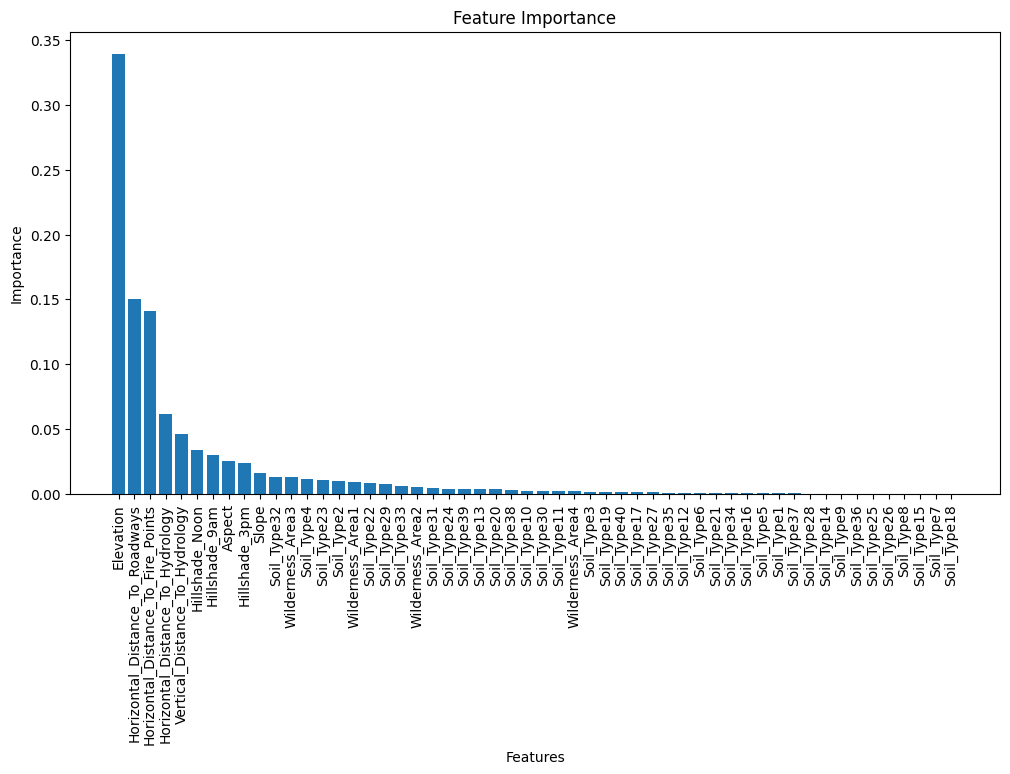

In [ ]:
plot_feature_importance(dt_model, X_train.columns)

## Random Forest

### Training

In [ ]:
# n_jobs=-1 to use all CPU cores
rm_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rm_model.fit(X_train, y_train)

rm_y_pred = rm_model.predict(X_test)

### Evaluaing

Accuracy: 95.0%

Classification Report:
              precision    recall  f1-score   support

           1       0.96      0.94      0.95     42368
           2       0.95      0.97      0.96     56661
           3       0.94      0.96      0.95      7151
           4       0.92      0.86      0.89       549
           5       0.95      0.77      0.85      1899
           6       0.93      0.89      0.91      3473
           7       0.97      0.95      0.96      4102

    accuracy                           0.95    116203
   macro avg       0.95      0.91      0.92    116203
weighted avg       0.95      0.95      0.95    116203


Confusion Matrix:


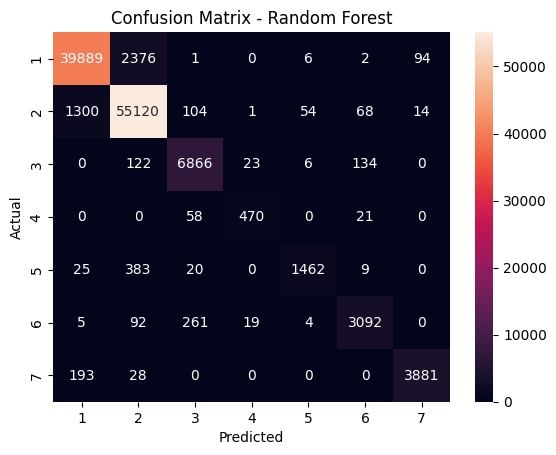

In [ ]:
evaluate_classification("Random Forest", y_test, rm_y_pred, [i for i in range(1, 8)])

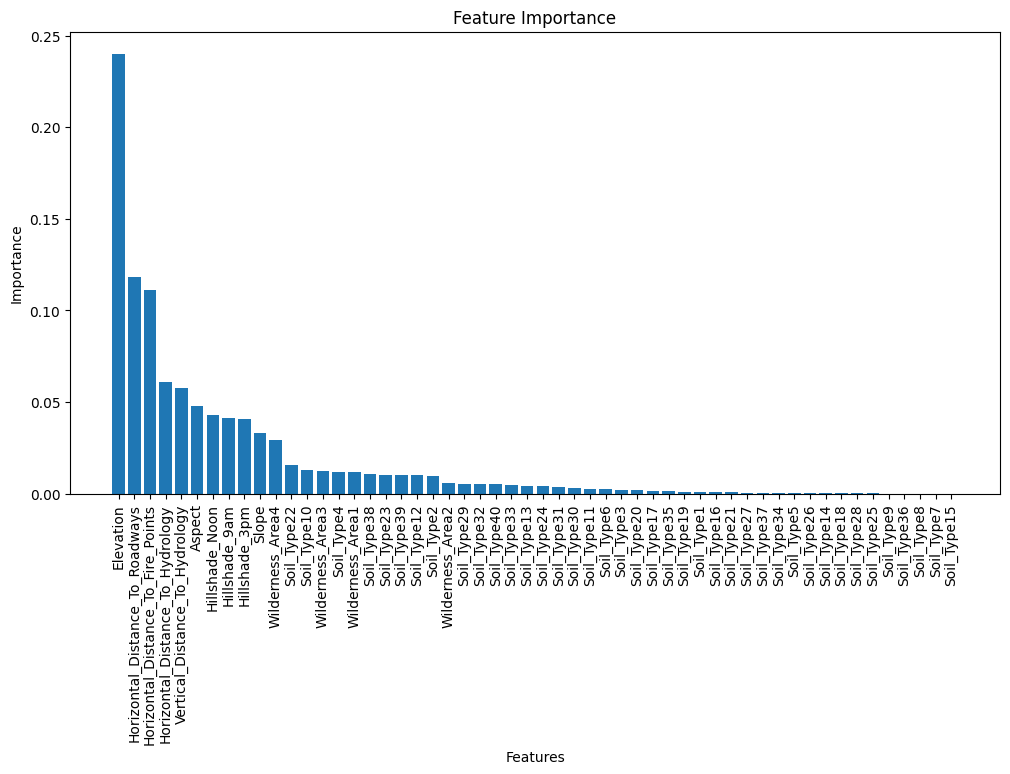

In [ ]:
plot_feature_importance(rm_model, X_train.columns)

## XGBoost

### Training

In [ ]:
xg_model = XGBClassifier(random_state=42)

# shift labels from [1-7] to [0-6] as the model expects 0 based labels
shifted_y_train = y_train - 1
shifted_y_test = y_test - 1

xg_model.fit(X_train, shifted_y_train)

xg_y_pred = xg_model.predict(X_test)

### Evaluating

Accuracy: 87.0%

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85     42368
           1       0.87      0.90      0.88     56661
           2       0.89      0.91      0.90      7151
           3       0.88      0.86      0.87       549
           4       0.89      0.61      0.72      1899
           5       0.85      0.80      0.82      3473
           6       0.95      0.91      0.93      4102

    accuracy                           0.87    116203
   macro avg       0.88      0.83      0.85    116203
weighted avg       0.87      0.87      0.87    116203


Confusion Matrix:


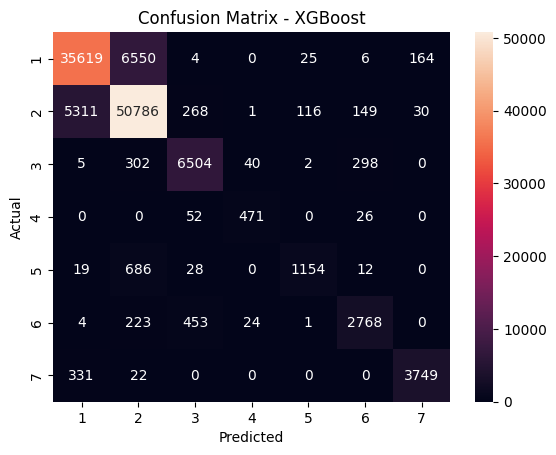

In [ ]:
evaluate_classification("XGBoost", shifted_y_test, xg_y_pred, [i for i in range(1, 8)])

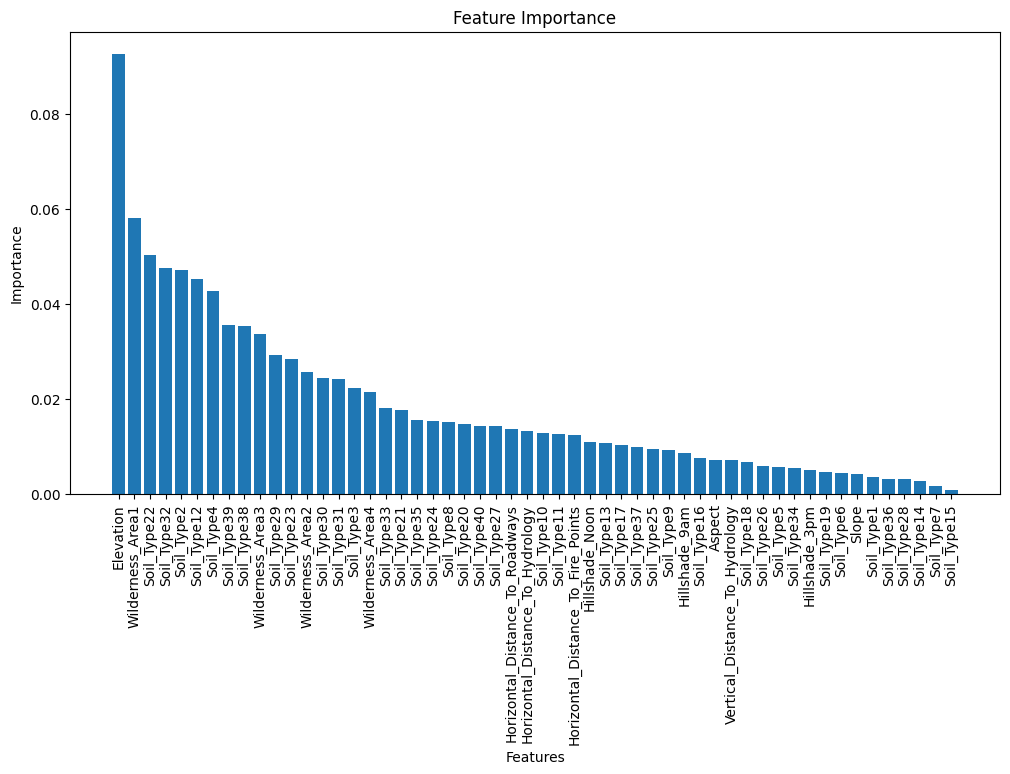

In [ ]:
plot_feature_importance(xg_model, X_train.columns)

# Hyperparameter Tuning

## Import libraries

In [ ]:
from sklearn.model_selection import GridSearchCV

## Reduce training dataset size

In [ ]:
# training data -> 11%, testing data 89%
X_train_reduced, _, y_train_reduced, _ = train_test_split(X, y, test_size=0.89, stratify=y, random_state=42)

As the data is large, the GridSearchCV will take a long time because it run all combinations of the parameters to get the best parameters, so reducing training dataset will make it faster.

## Decision Tree

In [ ]:
gs_dt = GridSearchCV(DecisionTreeClassifier(random_state=42),
    param_grid={
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 10, 50],
        "min_samples_leaf": [1, 5, 10],
    },
    # use accuracy as the evaluation metric for selecting the best parameters
    scoring="accuracy",
    n_jobs=-1
)

gs_dt.fit(X_train_reduced, y_train_reduced)

gs_dt_y_pred = gs_dt.predict(X_test)

hyp_df_dt = pd.DataFrame(gs_dt.cv_results_).sort_values(by="rank_test_score")
print("Best Parameters:", gs_dt.best_params_)
hyp_df_dt[["params", "mean_test_score", "rank_test_score"]].head()

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


,params,mean_test_score,rank_test_score
0,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.834223,1
18,"{'max_depth': 20, 'min_samples_leaf': 1, 'min_...",0.830906,2
19,"{'max_depth': 20, 'min_samples_leaf': 1, 'min_...",0.826524,3
1,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.826243,4
3,"{'max_depth': None, 'min_samples_leaf': 5, 'mi...",0.823880,5


Train and evaluate the model with the original dataset and best parameters.

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42, **gs_dt.best_params_)
dt_model.fit(X_train, y_train)

dt_y_pred = dt_model.predict(X_test)

Accuracy: 94.0%

Classification Report:
              precision    recall  f1-score   support

           1       0.94      0.94      0.94     42368
           2       0.95      0.95      0.95     56661
           3       0.93      0.93      0.93      7151
           4       0.84      0.85      0.84       549
           5       0.84      0.84      0.84      1899
           6       0.88      0.87      0.88      3473
           7       0.95      0.94      0.95      4102

    accuracy                           0.94    116203
   macro avg       0.90      0.90      0.90    116203
weighted avg       0.94      0.94      0.94    116203


Confusion Matrix:


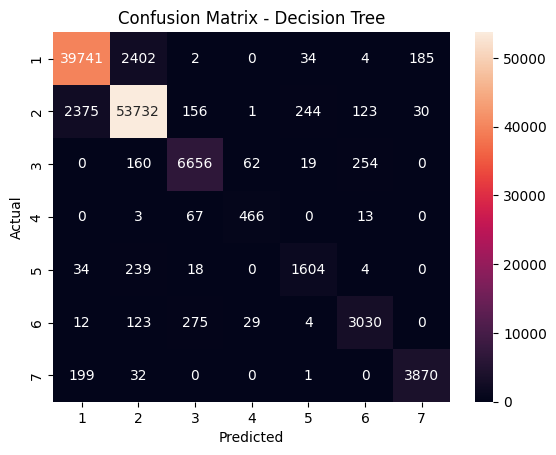

In [ ]:
evaluate_classification("Decision Tree", y_test, dt_y_pred, [i for i in range(1, 8)])

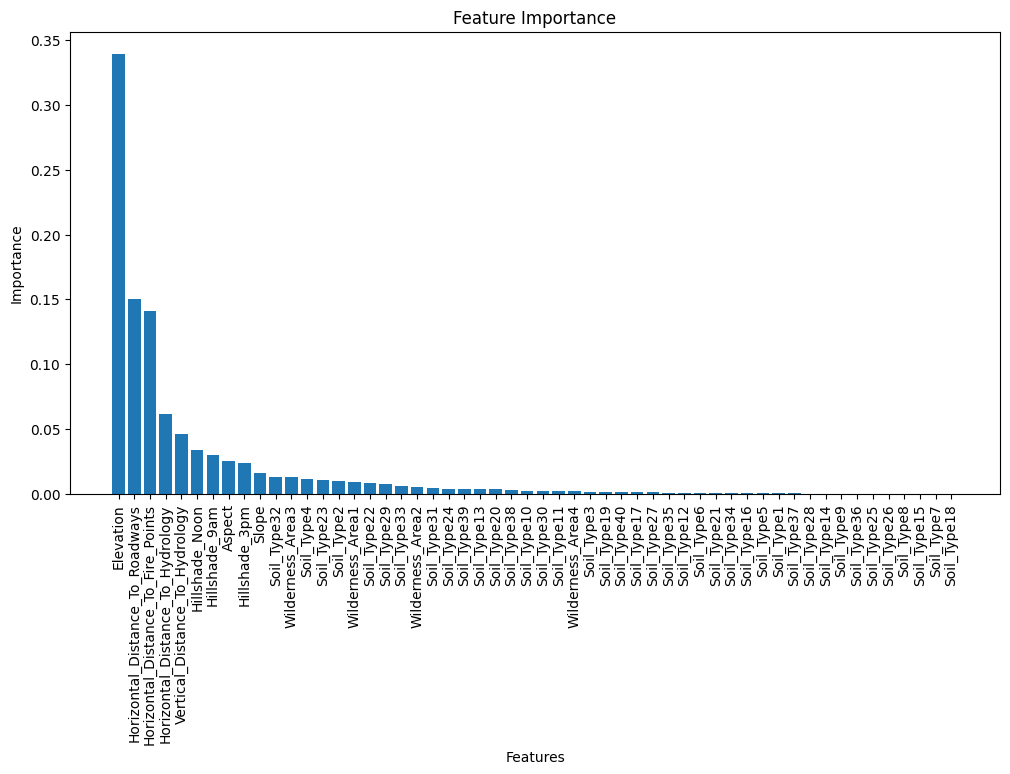

In [ ]:
plot_feature_importance(dt_model, X_train.columns)

Train and evaluate the model with the second parameters in the top 5 table to show if it will be the same as the best parameters or not.

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42, **gs_dt.cv_results_["params"][18])
dt_model.fit(X_train, y_train)

dt_y_pred = dt_model.predict(X_test)

Accuracy: 90.0%

Classification Report:
              precision    recall  f1-score   support

           1       0.92      0.88      0.90     42368
           2       0.90      0.94      0.92     56661
           3       0.91      0.90      0.91      7151
           4       0.85      0.78      0.82       549
           5       0.82      0.59      0.68      1899
           6       0.82      0.80      0.81      3473
           7       0.95      0.92      0.93      4102

    accuracy                           0.90    116203
   macro avg       0.88      0.83      0.85    116203
weighted avg       0.90      0.90      0.90    116203


Confusion Matrix:


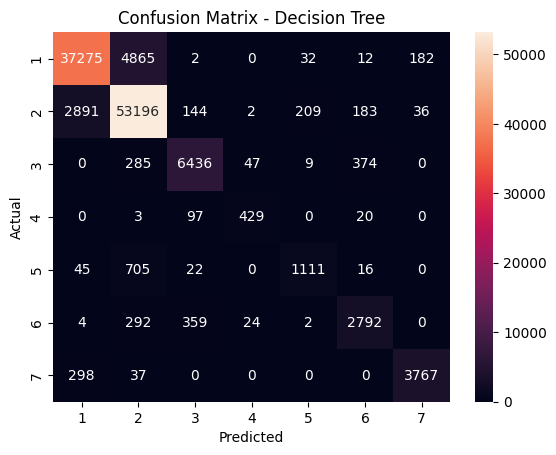

In [ ]:
evaluate_classification("Decision Tree", y_test, dt_y_pred, [i for i in range(1, 8)])

The second parameters in the top 5 table has less accuarcy than the best parameters.

## Random Forest

In [ ]:
gs_rm = GridSearchCV(RandomForestClassifier(random_state=42),
    param_grid={
        "n_estimators": [100, 150],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 10, 50],
        "min_samples_leaf": [1, 5, 10]
    },
    # number of cross-validation
    cv=2,
    scoring="accuracy",
    n_jobs=-1
)

gs_rm.fit(X_train_reduced, y_train_reduced)

rs_rm_y_pred = gs_rm.predict(X_test)

hyp_df_rm = pd.DataFrame(gs_rm.cv_results_).sort_values(by="rank_test_score")
print("Best Parameters:", gs_rm.best_params_)
hyp_df_rm[["params",  "mean_test_score", "rank_test_score"]].head()

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


,params,mean_test_score,rank_test_score
1,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.865986,1
0,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.865094,2
3,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.850480,3
2,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.849431,4
36,"{'max_depth': 20, 'min_samples_leaf': 1, 'min_...",0.838259,5


Train and evaluate the model with the original dataset and best parameters.

In [ ]:
rm_model = RandomForestClassifier(random_state=42, **gs_rm.best_params_)
rm_model.fit(X_train, y_train)

rm_y_pred = rm_model.predict(X_test)

Accuracy: 95.0%

Classification Report:
              precision    recall  f1-score   support

           1       0.96      0.94      0.95     42368
           2       0.95      0.97      0.96     56661
           3       0.94      0.96      0.95      7151
           4       0.92      0.85      0.88       549
           5       0.95      0.77      0.85      1899
           6       0.93      0.89      0.91      3473
           7       0.97      0.95      0.96      4102

    accuracy                           0.95    116203
   macro avg       0.95      0.91      0.92    116203
weighted avg       0.95      0.95      0.95    116203


Confusion Matrix:


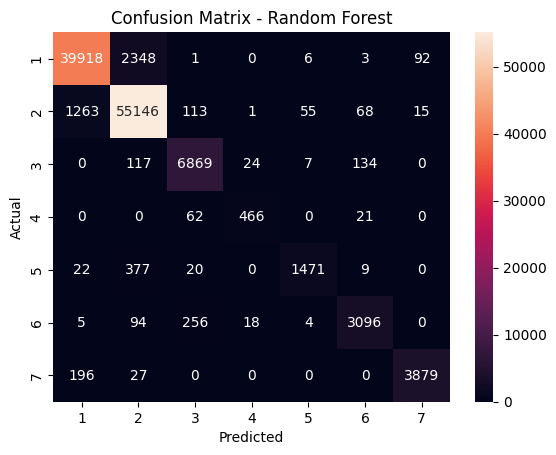

In [ ]:
evaluate_classification("Random Forest", y_test, rm_y_pred, [i for i in range(1, 8)])

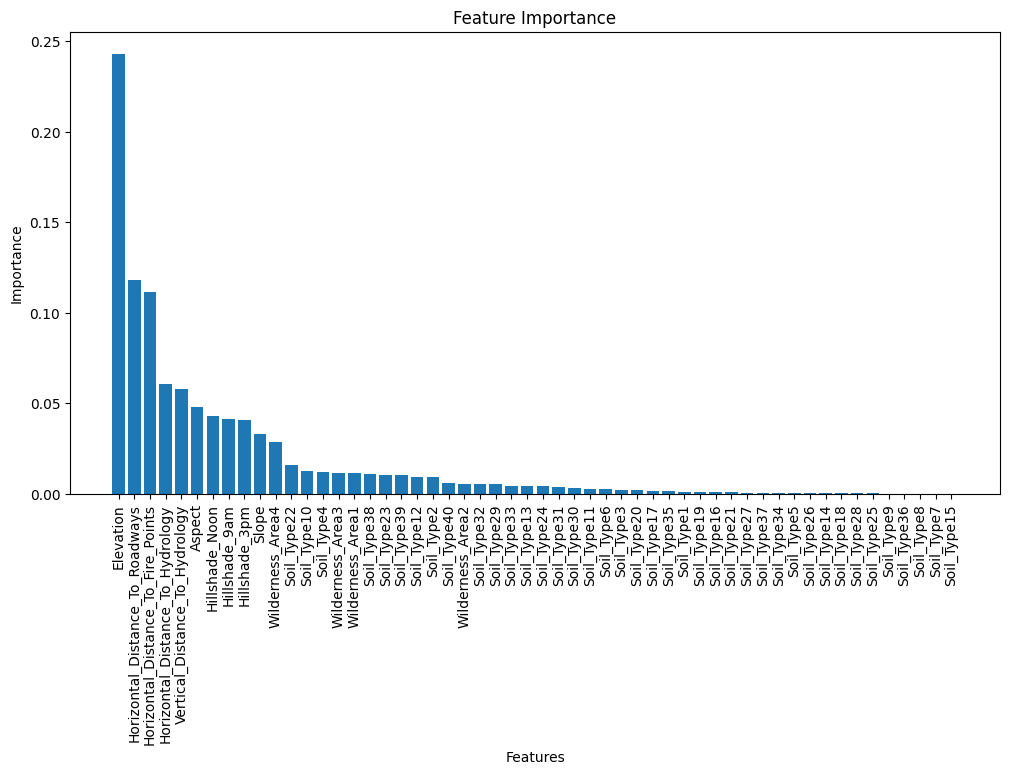

In [ ]:
plot_feature_importance(rm_model, X_train.columns)

The best parameters have approximately the same accuracy as the model with default parameters values, but with fewer errors that don't have a significant effect on the accuracy. The difference is the n_estimators parameter, which determines the number of trees generated, and n_estimators is equal to 100 by default, so the model with default parameters is faster in training.

Train and evaluate the model with the third parameters in the top 5 table.

In [ ]:
rm_model = RandomForestClassifier(random_state=42, **gs_rm.cv_results_["params"][3])
rm_model.fit(X_train, y_train)

rm_y_pred = rm_model.predict(X_test)

Accuracy: 95.0%

Classification Report:
              precision    recall  f1-score   support

           1       0.96      0.93      0.95     42368
           2       0.94      0.97      0.96     56661
           3       0.93      0.96      0.94      7151
           4       0.91      0.84      0.87       549
           5       0.95      0.72      0.82      1899
           6       0.93      0.87      0.90      3473
           7       0.97      0.93      0.95      4102

    accuracy                           0.95    116203
   macro avg       0.94      0.89      0.91    116203
weighted avg       0.95      0.95      0.95    116203


Confusion Matrix:


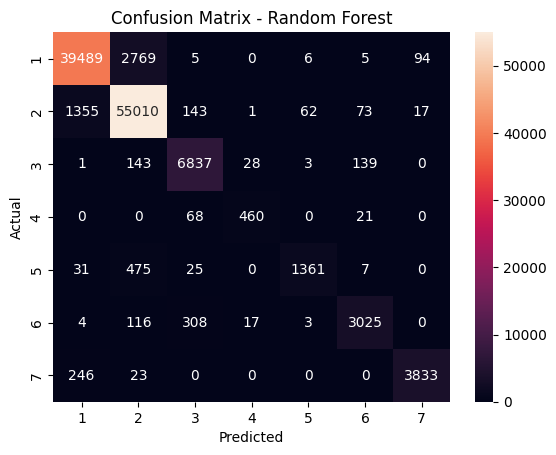

In [ ]:
evaluate_classification("Random Forest", y_test, rm_y_pred, [i for i in range(1, 8)])

It gives approximately the same accuracy as the previous parameters, but with more errors that don't have a significant effect on the accuracy.

## XGBoost

In [ ]:
gs_xg = GridSearchCV(XGBClassifier(random_state=42),
    param_grid={
        "n_estimators": [100, 150],
        "max_depth": [None, 10, 20],
        "learning_rate": [0.1, 0.2, 0.3],
    },
    cv=2,
    scoring="accuracy",
    n_jobs=-1
)

shifted_y_train_reduced = y_train_reduced - 1

gs_xg.fit(X_train_reduced, shifted_y_train_reduced)

gs_xg_y_pred = gs_xg.predict(X_test)

hyp_df_xg = pd.DataFrame(gs_xg.cv_results_).sort_values(by="rank_test_score")
print("Best Parameters:", gs_xg.best_params_)
hyp_df_xg[["params", "mean_test_score", "rank_test_score"]].head()

Best Parameters: {'learning_rate': 0.3, 'max_depth': 20, 'n_estimators': 150}


,params,mean_test_score,rank_test_score
17,"{'learning_rate': 0.3, 'max_depth': 20, 'n_est...",0.895714,1
16,"{'learning_rate': 0.3, 'max_depth': 20, 'n_est...",0.894713,2
11,"{'learning_rate': 0.2, 'max_depth': 20, 'n_est...",0.894275,3
10,"{'learning_rate': 0.2, 'max_depth': 20, 'n_est...",0.893821,4
5,"{'learning_rate': 0.1, 'max_depth': 20, 'n_est...",0.893164,5


Train and evaluate the model with the original dataset and best parameters.

In [ ]:
xg_model = XGBClassifier(random_state=42, **gs_xg.best_params_)
xg_model.fit(X_train, shifted_y_train)

xg_y_pred = xg_model.predict(X_test)

Accuracy: 97.0%

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     42368
           1       0.97      0.98      0.98     56661
           2       0.96      0.97      0.97      7151
           3       0.90      0.86      0.88       549
           4       0.94      0.89      0.92      1899
           5       0.95      0.94      0.95      3473
           6       0.98      0.97      0.97      4102

    accuracy                           0.97    116203
   macro avg       0.96      0.94      0.95    116203
weighted avg       0.97      0.97      0.97    116203


Confusion Matrix:


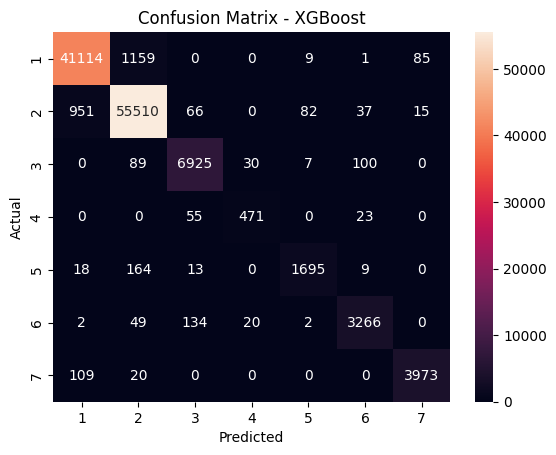

In [ ]:
evaluate_classification("XGBoost", shifted_y_test, xg_y_pred, [i for i in range(1, 8)])

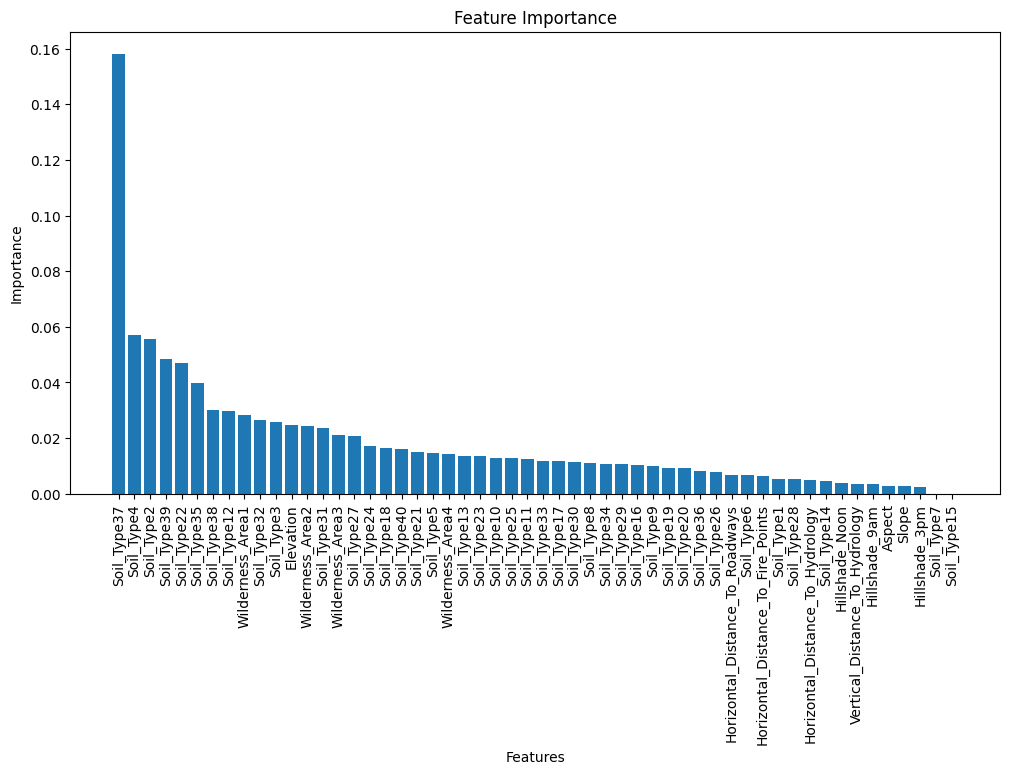

In [ ]:
plot_feature_importance(xg_model, X_train.columns)

Train and evaluate the model with the second parameters in the top 5 table to show if it will be the same as the best parameters or not.

In [ ]:
xg_model = XGBClassifier(random_state=42, **gs_xg.cv_results_["params"][16])
xg_model.fit(X_train, shifted_y_train)

xg_y_pred = xg_model.predict(X_test)

Accuracy: 97.0%

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     42368
           1       0.97      0.98      0.98     56661
           2       0.96      0.97      0.97      7151
           3       0.90      0.86      0.88       549
           4       0.94      0.89      0.92      1899
           5       0.95      0.94      0.95      3473
           6       0.98      0.97      0.97      4102

    accuracy                           0.97    116203
   macro avg       0.96      0.94      0.95    116203
weighted avg       0.97      0.97      0.97    116203


Confusion Matrix:


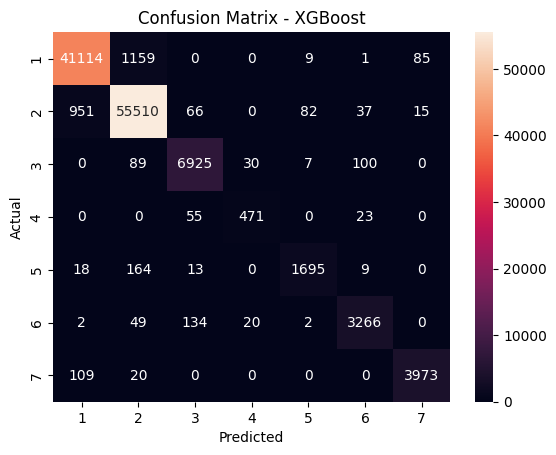

In [ ]:
evaluate_classification("XGBoost", shifted_y_test, xg_y_pred, [i for i in range(1, 8)])

It is similar to the best parameters, but it is faster, as it generates 100 trees instead of 150, so the the second is faster.

Train and evaluate the model with the third parameters in the top 5 table to show if it will be the same as the best parameters or not.

In [ ]:
xg_model = XGBClassifier(random_state=42, **gs_xg.cv_results_["params"][11])
xg_model.fit(X_train, shifted_y_train)

xg_y_pred = xg_model.predict(X_test)

Accuracy: 97.0%

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     42368
           1       0.97      0.98      0.98     56661
           2       0.96      0.97      0.97      7151
           3       0.91      0.87      0.89       549
           4       0.94      0.89      0.92      1899
           5       0.95      0.94      0.95      3473
           6       0.98      0.97      0.97      4102

    accuracy                           0.97    116203
   macro avg       0.96      0.94      0.95    116203
weighted avg       0.97      0.97      0.97    116203


Confusion Matrix:


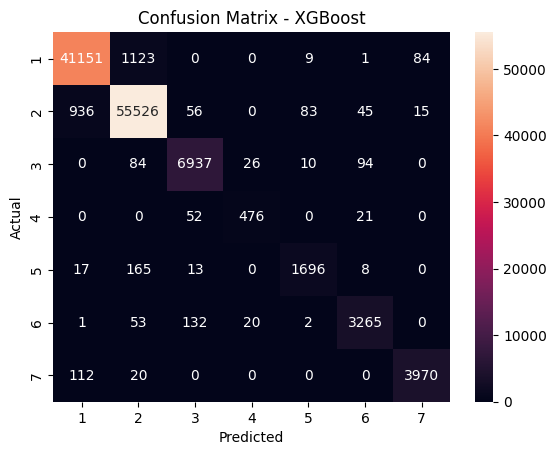

In [ ]:
evaluate_classification("XGBoost", shifted_y_test, xg_y_pred, [i for i in range(1, 8)])

It has approximately the same accuracy as the previous parameters, but with fewer errors in all cover types except the 7th cover type; it correctly predicts 3970, but the previous parameters predict 7973.

# Decision Tree vs Random Forest vs XGBoost

Based on hyperparameter tuning, the best model is XGBoost

Based on training execution time and good accuracy, the best model is Decision Tree

Based on training with default parameters, the best model is Random Forest